In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt
import os 
from tqdm import tqdm

In [4]:
ds = xr.open_dataset("/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-corrections.nc")
ds

<xarray.Dataset>
Dimensions:        (time: 232, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) float32 107.0 129.5 227.5 ... 8.11e+03 8.141e+03
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-07-14T18:38:23Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [3]:
# variables in dataset
ds.data_vars

Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...

In [4]:
ds.dims

Frozen({'time': 232, 'timebound': 2, 'lon': 1440, 'lat': 720})

In [5]:
ds.coords

Coordinates:
  * time     (time) float32 107.0 129.5 227.5 ... 8.08e+03 8.11e+03 8.141e+03
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88

In [6]:
ds.info()

xarray.Dataset {
dimensions:
	time = 232 ;
	timebound = 2 ;
	lon = 1440 ;
	lat = 720 ;

variables:
	float32 time_bounds(time, timebound) ;
	float32 time(time) ;
		time:bounds = time_bounds ;
		time:calendar = gregorian ;
		time:axis = T ;
		time:standard_name = Time ;
		time:long_name = Time ;
		time:Units = days since 2002-01-01T00:00:00Z ;
	float32 lon(lon) ;
		lon:bounds = lon_bounds ;
		lon:valid_max = 359.875 ;
		lon:valid_min = 0.125 ;
		lon:axis = X ;
		lon:standard_name = Longitude ;
		lon:long_name = Longitude ;
		lon:Units = degrees_east ;
	float32 lat(lat) ;
		lat:bounds = lat_bounds ;
		lat:valid_max = 89.875 ;
		lat:valid_min = -89.875 ;
		lat:axis = Y ;
		lat:standard_name = Latitude ;
		lat:long_name = Latitude ;
		lat:Units = degrees_north ;
	float32 lwe_thickness(time, lat, lon) ;
		lwe_thickness:grid_mapping = WGS84 ;
		lwe_thickness:standard_name = Liquid_Water_Equivalent_Thickness ;
		lwe_thickness:long_name = Liquid_Water_Equivalent_Thickness ;
		lwe_thickness:Unit

In [7]:
ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3, ISO 8601',
 'filename': 'netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-corrections.nc',
 'Metadata_Conventions': 'Unidata Dataset Discovery v1.0',
 'standard_name_vocabulary': 'NetCDF Climate and Forecast (CF) Metadata Convention-1.6',
 'title': 'CSR GRACE and GRACE-FO MASCON RL0602M',
 'subtitle': 'RL06.2 GRACE/GRACE-FO Total water storage with all correction applied',
 'summary': 'Monthly mass anomaly grids from GRACE and GRACE-FO determined from CSR RL06.2 processing',
 'keywords': 'Solid Earth, Geodetics/Gravity, Gravity, liquid_water_equivalent_thickness',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'platform': 'GRACE and GRACE-FO',
 'institution': 'The University of Texas - Center for Space Research (CSR)',
 'creator_name': 'Himanshu Save',
 'creator_email': 'grace@csr.utexas.edu',
 'creator_url': 'http://www2.csr.utexas.edu/grace',
 'creator_type': 'group',
 'creator_institution': 'UT-CSR',
 'publisher

In [8]:
# check the unit of the time and change to datatime dtype if necessary
ds.lwe_thickness.time.attrs["Units"]

'days since 2002-01-01T00:00:00Z'

In [5]:
# Extract the time coordinate values and units
time_values = ds.lwe_thickness.time.values
time_units = ds.lwe_thickness.time.attrs['Units']

# Extract the base time from the Units attribute
base_time_str = time_units.split('since ')[1]
base_time = pd.to_datetime(base_time_str)
time_as_datetime = base_time + pd.to_timedelta(time_values, unit='D')

time_as_datetime_np = np.array(time_as_datetime, dtype='datetime64[ns]')

# Replace the time coordinate in the dataset with the datetime64 values
ds = ds.assign_coords(time=('time', time_as_datetime_np))
ds

<xarray.Dataset>
Dimensions:        (time: 232, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 ... 2024-04-16
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-07-14T18:38:23Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [10]:
ds.lwe_thickness

<xarray.DataArray 'lwe_thickness' (time: 232, lat: 720, lon: 1440)>
[240537600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-04-18 2002-05-10T12:00:00 ... 2024-04-16
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    grid_mapping:   WGS84
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

In [11]:
ds.time_bounds

<xarray.DataArray 'time_bounds' (time: 232, timebound: 2)>
[464 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-04-18 2002-05-10T12:00:00 ... 2024-04-16
Dimensions without coordinates: timebound

In [12]:
ds.lwe_thickness.values

array([[[-2.7126658 , -2.7126658 , -2.7126658 , ..., -2.7126658 ,
         -2.7126658 , -2.7126658 ],
        [-2.7126658 , -2.7126658 , -2.7126658 , ..., -2.7126658 ,
         -2.7126658 , -2.7126658 ],
        [-3.493693  , -3.493693  , -3.493693  , ..., -3.493693  ,
         -3.493693  , -3.493693  ],
        ...,
        [-2.4626598 , -2.4626598 , -2.4626598 , ..., -2.4626598 ,
         -2.4626598 , -2.4626598 ],
        [-2.62308   , -2.62308   , -2.62308   , ..., -2.62308   ,
         -2.62308   , -2.62308   ],
        [-2.62308   , -2.62308   , -2.62308   , ..., -2.62308   ,
         -2.62308   , -2.62308   ]],

       [[-1.9613819 , -1.9613819 , -1.9613819 , ..., -1.9613819 ,
         -1.9613819 , -1.9613819 ],
        [-1.9613819 , -1.9613819 , -1.9613819 , ..., -1.9613819 ,
         -1.9613819 , -1.9613819 ],
        [-2.8264503 , -2.8264503 , -2.8264503 , ..., -2.8264503 ,
         -2.8264503 , -2.8264503 ],
        ...,
        [-4.330787  , -4.330787  , -4.330787  , ..., -

In [3]:
def plot_map(xr_data, var, title="Global Liquid Water Equivalent Thickness"):

    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())

    timeslice = xr_data.sel(time=dt.datetime(2016,7,10), method="nearest")   # edit to date of choice
    timeslice[var].plot(ax=ax, transform=ccrs.PlateCarree(),cmap="seismic")
    ax.coastlines()
    plt.title(f'{title} for date {timeslice.time.values.astype("datetime64[D]")}')
    ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

    # free resources
    del timeslice

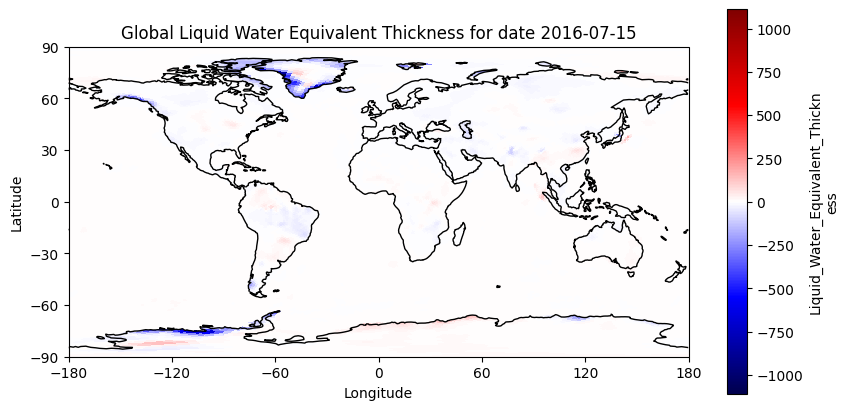

In [7]:
plot_map(ds, "lwe_thickness")

In [4]:
# convert dataset to datafram
df = ds.to_dataframe()
df

time_bounds  lwe_thickness
time       timebound lon     lat                                
2002-04-18 0         0.125   -89.875         94.0      -2.712666
                             -89.625         94.0      -2.712666
                             -89.375         94.0      -3.493693
                             -89.125         94.0      -3.493693
                             -88.875         94.0      -3.493693
...                                           ...            ...
2024-04-16 1         359.875  88.875       8156.0       5.076348
                              89.125       8156.0       5.076348
                              89.375       8156.0       5.076348
                              89.625       8156.0       4.672384
                              89.875       8156.0       4.672384

[481075200 rows x 2 columns]

In [5]:
df.reset_index(inplace=True)
df

,time,timebound,lon,lat,time_bounds,lwe_thickness
0,2002-04-18,0,0.125,-89.875,94.0,-2.712666
1,2002-04-18,0,0.125,-89.625,94.0,-2.712666
2,2002-04-18,0,0.125,-89.375,94.0,-3.493693
3,2002-04-18,0,0.125,-89.125,94.0,-3.493693
4,2002-04-18,0,0.125,-88.875,94.0,-3.493693
...,...,...,...,...,...,...
481075195,2024-04-16,1,359.875,88.875,8156.0,5.076348
481075196,2024-04-16,1,359.875,89.125,8156.0,5.076348
481075197,2024-04-16,1,359.875,89.375,8156.0,5.076348
481075198,2024-04-16,1,359.875,89.625,8156.0,4.672384


In [6]:
# free resources
try:
    del ds
    print("Deleted ds object")
except:
    pass

Deleted ds object


In [2]:
lat_min = -90
lat_max = 90
long_min = 0
long_max = 360

patch_len = 20 # => 20 x 20 patches all over the map

patches = []


for long in range(long_min, long_max - patch_len + 1, patch_len):
    for lat in range(lat_min, lat_max - patch_len + 1, patch_len):
        
        patch_lat_start = lat
        patch_lat_end = lat + patch_len
        patch_long_start = long
        patch_long_end = long+ patch_len
        
        patches.append({
            "long_start": patch_long_start,
            "long_end": patch_long_end,
            "lat_start": patch_lat_start,
            "lat_end": patch_lat_end,
        })
        
#         print("- Patch:")
#         print("\tlat: {0}<=>{1}".format(patch_lat_start, patch_lat_end))
#         print("\tlong: {0}<=>{1}".format(patch_long_start, patch_long_end))
print("grids of {0} X {0} created all over the map!".format(patch_len, patch_len))

grids of 20 X 20 created all over the map!


In [59]:
print(len(patches))

162


In [9]:
# Let's Query a grid
patch = patches[385]
print(patch)

{'long_start': 210, 'long_end': 220, 'lat_start': -20, 'lat_end': -10}


In [10]:
lat_start = patch["lat_start"]
lat_end = patch["lat_end"]
long_start = patch["long_start"]
long_end = patch["long_end"]

df_patch = df.query("@long_start <= lon <= @long_end and @lat_start <= lat <= @lat_end")
df_patch

,time,timebound,lon,lat,time_bounds,lwe_thickness
605080,2002-04-18,0,210.125,-19.875,94.0,-1.007885
605081,2002-04-18,0,210.125,-19.625,94.0,-1.266528
605082,2002-04-18,0,210.125,-19.375,94.0,-1.266528
605083,2002-04-18,0,210.125,-19.125,94.0,-1.266528
605084,2002-04-18,0,210.125,-18.875,94.0,-1.344615
...,...,...,...,...,...,...
480671595,2024-04-16,1,219.875,-11.125,8156.0,3.221901
480671596,2024-04-16,1,219.875,-10.875,8156.0,3.221901
480671597,2024-04-16,1,219.875,-10.625,8156.0,3.221901
480671598,2024-04-16,1,219.875,-10.375,8156.0,3.549578


### Average the Lwe-thickness varible monthly and add exogenous features

In [3]:
def average_var(df, var):

    # Convert the latitude to radian
    df['lat_rad'] = np.radians(df['lat'])

    # Cosine weighting is used because the Earth is spherical, and areas closer to the poles appear smaller when projected onto a flat map (like a grid).
    df['cosine_weight'] = np.cos(df['lat_rad']) 

    # Compute weighted sums and total weights
    df['weighted_lwe'] = df[var] * df['cosine_weight']

    # Group by 'time' and aggregate using sum
    grouped = df.groupby('time').agg({'weighted_lwe': 'sum', 'cosine_weight': 'sum'})
    grouped[f'avg_{var}'] = grouped['weighted_lwe'] / grouped['cosine_weight']

    grouped.drop(["weighted_lwe", "cosine_weight"], axis=1, inplace=True)
    grouped.reset_index(inplace=True)
    grouped['time'] = pd.to_datetime(grouped['time'])
    grouped['time'] = grouped['time'].dt.date
    
    return grouped

In [4]:
def clean_data(df, val_col_name):

    # Set all dates to the 1st of the month
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].apply(lambda x: x.replace(day=1))
    df = df.drop_duplicates(subset='time')
    df = df.set_index("time")

    datetime_seq = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
    df2 = pd.DataFrame(datetime_seq, columns=["time"])

        
    # Use boolean indexing to assign values
    for date in datetime_seq:
        if date in df.index:
            value =  df.loc[date, val_col_name]
            df2.loc[df2['time'] == date, val_col_name] = value
        else:
            df2.loc[df2['time'] == date, val_col_name] = np.nan

    # Convert to float and handle NaN interpolation
    df2[val_col_name] = df2[val_col_name].interpolate(method="linear")

    return df2 

In [9]:
def save_all_patches(df, patches, var):

    print("> Saving all patches...")
    # Let's query all grids and save them to a file 
    for i, patch in tqdm(enumerate(patches), total=len(patches)):
        if i <= 13:
            continue
        lat_start = patch["lat_start"]
        lat_end = patch["lat_end"]
        long_start = patch["long_start"]
        long_end = patch["long_end"]

        df_patch = df.query("@long_start <= lon <= @long_end and @lat_start <= lat <= @lat_end")

        if df_patch.empty:
            print(f"Patch {i}-- {patch} is empty, skipping...")
            continue
        
        # Average the variable on monthly freq
        grouped = average_var(df_patch, var)
        # Clean the data
        df_clean = clean_data(grouped, f"avg_{var}")
        
        # create filepath and directory
        main_dir = "/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/raw/" + var

        if not os.path.exists(main_dir):
            os.makedirs(main_dir)

        filepath = os.path.join(main_dir, f"{lat_start}_{lat_end}_{long_start}_{long_end}_{i}.csv")

        # save the file
        df_clean.to_csv(filepath, index=False)
        
        del df_patch
        del df_clean

    print("Done!")
    return None

In [ ]:
save_all_patches(df, patches, "lwe_thickness")

In [20]:
del df
del df_patch

### Surface water temperature data from NOAA

In [8]:
url = "https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5.1/NOAAGlobalTemp_v5.1.0_gridded_s185001_e202312_c20240108T150239.nc"
temp_ds = xr.open_dataset(url)
temp_ds

<xarray.Dataset>
Dimensions:  (time: 2088, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P174Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2024-01-08T20:02:41Z
    date_issued:                     2024-01-08T20:02:41Z

In [3]:
temp_ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3',
 'title': 'NOAA Merged Land Ocean Global Surface Temperature Analysis (NOAAGlobalTemp)',
 'summary': 'NOAAGlobalTemp is a merged land-ocean surface temperature analysis, formerly abbreviated as MLOST. The SST dataset is the Extended Reconstructed Sea Surface Temperature (ERSST) and the land surface air temperature dataset is from the Global Historical Climatology Network Monthly (GHCN-M) database.',
 'institution': 'DOC/NOAA/NESDIS/National Centers for Environmental Information(NCEI)',
 'id': ' gov.noaa.ncdc:C00934 ',
 'naming_authority': ' gov.noaa.ncei ',
 'project': ' NOAAGlobalTemp ',
 'platform': 'Ships, moored buoys, surface drifting buoys, Argo floats, and weather stations',
 'instrument': 'Conventional thermometers',
 'history': 'Version 5.1.0, blending ERSST V5 and GHCN-M V4.',
 'comment': 'Merged land ocean surface temperature anomalies.',
 'product_version': '5.1.0',
 'source': 'NOAAGlobalTemp combines a global sea surface temperature with

In [4]:
temp_ds.info()

xarray.Dataset {
dimensions:
	time = 2088 ;
	lat = 36 ;
	lon = 72 ;
	z = 1 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = reference time of global temperature anomalies ;
		time:standard_name = time ;
		time:coverage_content_type = coordinate ;
		time:axis = T ;
	float32 lat(lat) ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:coverage_content_type = coordinate ;
		lat:units = degrees_north ;
		lat:grids = Uniform grid from -87.5 to 87.5 by 5 ;
		lat:valid_min = -87.5 ;
		lat:valid_max = 87.5 ;
		lat:axis = Y ;
		lat:_CoordinateAxisType = Lat ;
		lat:coordinate_defines = center ;
	float32 lon(lon) ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:coverage_content_type = coordinate ;
		lon:units = degrees_east ;
		lon:grids = Uniform grid from 2.5 to 357.5 by 5 ;
		lon:axis = X ;
		lon:valid_min = 2.5 ;
		lon:valid_max = 357.5 ;
		lon:_CoordinateAxisType = Lon ;
		lon:coordinate_defines = center ;
	float32 z(z) ;
		z:long_name =

In [6]:
temp_ds.anom

<xarray.DataArray 'anom' (time: 2088, z: 1, lat: 36, lon: 72)>
[5412096 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Attributes:
    long_name:              Global Temperature Anomalies
    standard_name:          surface_temperature_anomaly
    coverage_content_type:  physicalMeasurement
    units:                  degrees C
    valid_min:              -40.0
    valid_max:              40.0

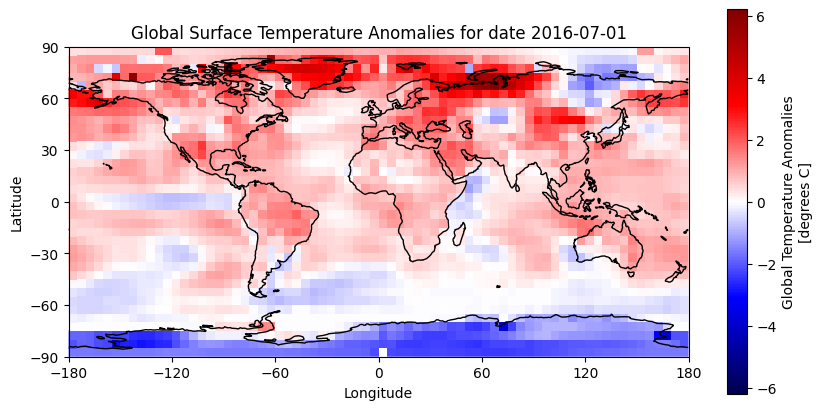

In [9]:
# plot the map of surface temperature 
plot_map(temp_ds, "anom", title="Global Surface Temperature Anomalies")

In [7]:
df_temp = temp_ds.to_dataframe()

In [8]:
df_temp.reset_index(inplace=True)

In [ ]:
# save all grids for temperature data
save_all_patches(df_temp, patches, "anom")

### Global Precipitaion Data from NOAA

In [14]:
# Precipitation of a single month data 
# https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00979
ds_prcp = xr.open_dataset("https://www.ncei.noaa.gov/thredds/dodsC/cdr/gpcp_final/2016/gpcp_v02r03_monthly_d201607_c20170616.nc")
ds_prcp

<xarray.Dataset>
Dimensions:       (latitude: 72, longitude: 144, time: 1, nv: 2)
Coordinates:
  * latitude      (latitude) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * longitude     (longitude) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time          (time) datetime64[ns] 2016-07-01
Dimensions without coordinates: nv
Data variables:
    lat_bounds    (latitude, nv) float32 ...
    lon_bounds    (longitude, nv) float32 ...
    time_bounds   (time, nv) datetime64[ns] ...
    precip        (time, latitude, longitude) float32 ...
    precip_error  (time, latitude, longitude) float32 ...
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     oc.201607.sg
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) ��ޒ�, Dr. Jian-Jian Wang, U of Maryland, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:C00979
    product_version:            v23rB1
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, Imager, Imager, AIRS > Atmospheric In...
    spatial_resolution:         2.5 degree
    comment:                    Processing computer: eagle2.umd.edu

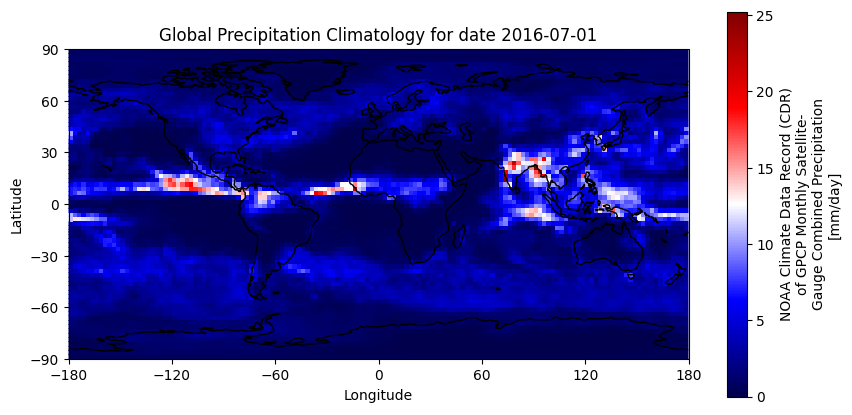

In [15]:
# Visualize the data
plot_map(ds_prcp, "precip", title="Global Precipitation Climatology")

In [35]:
# Load all the monthly precipitation data
prcp_dir =  "/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/precipitation"
filenames =  os.listdir(prcp_dir)

In [12]:
# Convert all netcdf to dataframe
df_total = []
for nc_file in filenames:
    if nc_file == ".DS_Store":
        continue
    filepath = os.path.join(prcp_dir, nc_file)
    xr_ds = xr.open_dataset(filepath)
    df = xr_ds.to_dataframe()
    df = df.reset_index()
    df_total.append(df)

In [20]:
df_prcp = pd.concat(df_total)
df_prcp = df_prcp.rename(columns={"latitude":"lat", "longitude":"lon"})
df_prcp

,lat,lon,time,nv,lat_bounds,lon_bounds,time_bounds,precip,precip_error
0,-88.75,1.25,2017-07-01,0,-90.0,0.0,2017-07-01,0.667193,0.693015
1,-88.75,1.25,2017-07-01,1,-87.5,2.5,2017-08-01,0.667193,0.693015
2,-88.75,3.75,2017-07-01,0,-90.0,2.5,2017-07-01,0.654990,0.688489
3,-88.75,3.75,2017-07-01,1,-87.5,5.0,2017-08-01,0.654990,0.688489
4,-88.75,6.25,2017-07-01,0,-90.0,5.0,2017-07-01,0.635565,0.681244
...,...,...,...,...,...,...,...,...,...
20731,88.75,353.75,2021-09-01,1,90.0,355.0,2021-10-01,0.517522,0.636050
20732,88.75,356.25,2021-09-01,0,87.5,355.0,2021-09-01,0.518580,0.636465
20733,88.75,356.25,2021-09-01,1,90.0,357.5,2021-10-01,0.518580,0.636465
20734,88.75,358.75,2021-09-01,0,87.5,357.5,2021-09-01,0.518070,0.636265


In [21]:
# save all grids to file
save_all_patches(df_prcp, patches, "precip")

> Saving all patches...


  0%|          | 0/162 [00:00<?, ?it/s]/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_4637/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_4637/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_4637/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

Done!


### Sea Level and kinetic energy of sea water from Copernicus

In [6]:
# https://cds-beta.climate.copernicus.eu/datasets/satellite-sea-level-global?tab=overview
sea_level = xr.open_dataset("/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/sea-level/dt_global_twosat_phy_l4_200406_vDT2021-M01.nc")
sea_level

<xarray.Dataset>
Dimensions:           (time: 1, nv: 2, latitude: 720, longitude: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2004-06-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 ...
    climatology_bnds  (time, nv) datetime64[ns] ...
    lat_bnds          (latitude, nv) float32 ...
    lon_bnds          (longitude, nv) float32 ...
    sla               (time, latitude, longitude) float64 ...
    eke               (time, latitude, longitude) float64 ...
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         Delayed Time Level-4 monthly means of Se...
    time_coverage_duration:          P1M
    time_coverage_end:               2004-06-30T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             2004-06-01T00:00:00Z
    title:                           DT merged two-satellite Global Ocean L4 ...

In [4]:
sea_level.data_vars["eke"]

<xarray.DataArray 'eke' (time: 1, latitude: 720, longitude: 1440)>
[1036800 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-15
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    cell_methods:   time: mean within years
    grid_mapping:   crs
    long_name:      Averaged Eddy Kinetic Energy 2016/06
    standard_name:  specific_kinetic_energy_of_sea_water
    units:          cm2/s2

In [6]:
sea_level.data_vars["sla"]

<xarray.DataArray 'sla' (time: 1, latitude: 720, longitude: 1440)>
[1036800 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-15
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    cell_methods:   time: mean within years
    grid_mapping:   crs
    long_name:      Averaged Sea Level Anomalies 2016/06
    standard_name:  sea_surface_height_above_sea_level
    units:          m

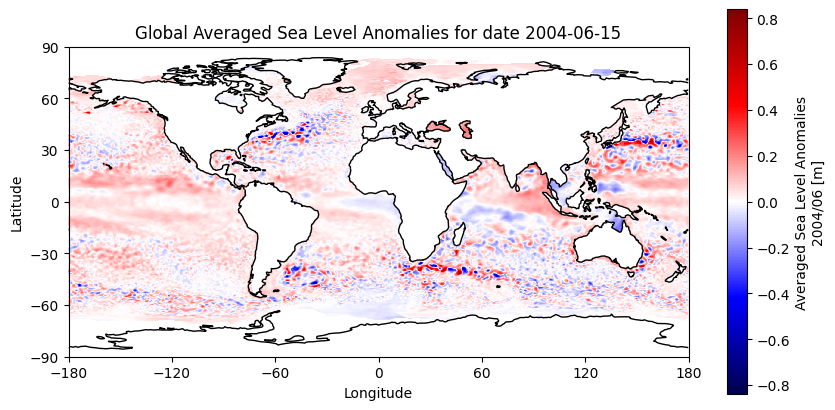

In [44]:
# plot the map of sea level anomalies
plot_map(sea_level, "sla", title="Global Averaged Sea Level Anomalies")

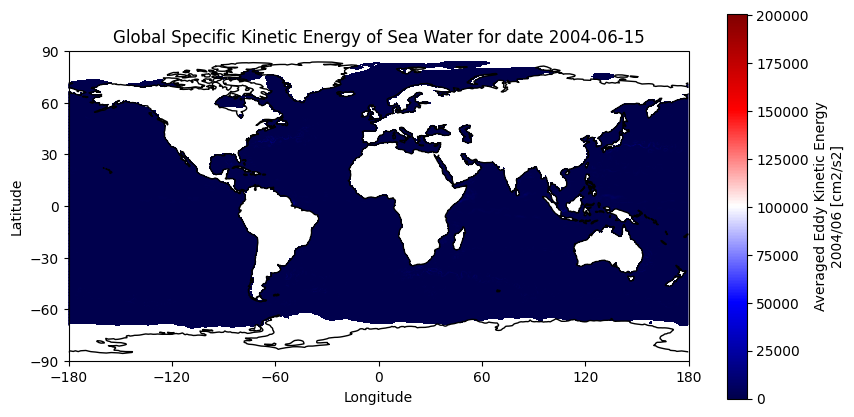

In [45]:
# plot the map of Sea level Eddy Kinetic Energy 
plot_map(sea_level, "eke", title="Global Specific Kinetic Energy of Sea Water")

In [6]:
# Load all the monthly sea level data
slevel_dir =  "/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/sea-level"
filenames =  os.listdir(slevel_dir)

In [7]:
# Convert all netcdf to dataframe
df_total = []
for nc_file in filenames:
    if nc_file == ".DS_Store":
        continue
    filepath = os.path.join(slevel_dir, nc_file)
    xr_ds = xr.open_dataset(filepath)
    df = xr_ds.to_dataframe().dropna()
    df = df.reset_index()
    df = df[["time", "latitude", "longitude", "sla", "eke"]]
    df_total.append(df)

In [8]:
df_slevel = pd.concat(df_total)
df_slevel = df_slevel.rename(columns={"latitude":"lat", "longitude":"lon"})
df_slevel

,time,lat,lon,sla,eke
0,2005-07-15,-70.375,249.125,0.0598,2.1973
1,2005-07-15,-70.375,249.375,0.0525,0.8295
2,2005-07-15,-70.375,249.625,0.0497,0.5564
3,2005-07-15,-70.375,249.875,0.0489,0.1516
4,2005-07-15,-70.375,250.125,0.0487,0.0348
...,...,...,...,...,...
1182409,2008-04-15,82.375,55.125,-0.0257,0.0000
1182410,2008-04-15,82.375,55.375,-0.0257,0.0000
1182411,2008-04-15,82.375,55.625,-0.0257,0.0001
1182412,2008-04-15,82.375,55.875,-0.0256,0.0000


In [10]:
# save all grids to file
save_all_patches(df_slevel, patches, "sla")

> Saving all patches...


python(2205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
  0%|          | 0/162 [00:00<?, ?it/s]/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b800

Patch 18-- {'long_start': 40, 'long_end': 60, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 27-- {'long_start': 60, 'long_end': 80, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 33-- {'long_start': 60, 'long_end': 80, 'lat_start': 30, 'lat_end': 50} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 36-- {'long_start': 80, 'long_end': 100, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 42-- {'long_start': 80, 'long_end': 100, 'lat_start': 30, 'lat_end': 50} is empty, skipping...


 27%|██▋       | 44/162 [16:11<57:40, 29.33s/it]  

Patch 43-- {'long_start': 80, 'long_end': 100, 'lat_start': 50, 'lat_end': 70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 45-- {'long_start': 100, 'long_end': 120, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 52-- {'long_start': 100, 'long_end': 120, 'lat_start': 50, 'lat_end': 70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 54-- {'long_start': 120, 'long_end': 140, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 63-- {'long_start': 140, 'long_end': 160, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_2103/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Done!


In [13]:
# save all grids to file
save_all_patches(df_slevel, patches, "eke")

> Saving all patches...


  0%|          | 0/162 [00:00<?, ?it/s]/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

Patch 5-- {'long_start': 0, 'long_end': 20, 'lat_start': 10, 'lat_end': 30} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 18-- {'long_start': 40, 'long_end': 60, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 27-- {'long_start': 60, 'long_end': 80, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 33-- {'long_start': 60, 'long_end': 80, 'lat_start': 30, 'lat_end': 50} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 36-- {'long_start': 80, 'long_end': 100, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 42-- {'long_start': 80, 'long_end': 100, 'lat_start': 30, 'lat_end': 50} is empty, skipping...


 27%|██▋       | 44/162 [16:58<37:55, 19.28s/it]

Patch 43-- {'long_start': 80, 'long_end': 100, 'lat_start': 50, 'lat_end': 70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 45-- {'long_start': 100, 'long_end': 120, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 52-- {'long_start': 100, 'long_end': 120, 'lat_start': 50, 'lat_end': 70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 54-- {'long_start': 120, 'long_end': 140, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Patch 63-- {'long_start': 140, 'long_end': 160, 'lat_start': -90, 'lat_end': -70} is empty, skipping...


/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1091/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

[]
Done!


### Pressure Levels (Relative Humidity and Specific Cloud Liquid Water Content) Data

In [7]:
# https://cds-beta.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels-monthly-means?tab=overview
pressure = xr.open_dataset("/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/data_0.nc")
pressure

<xarray.Dataset>
Dimensions:         (date: 272, pressure_level: 1, latitude: 721,
                     longitude: 1440)
Coordinates:
  * date            (date) int64 20020101 20020201 ... 20240701 20240801
  * pressure_level  (pressure_level) float64 1e+03
  * latitude        (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude       (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    number          int64 ...
    expver          (date) object ...
    r               (date, pressure_level, latitude, longitude) float32 ...
    clwc            (date, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-15T08:36 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
time_values = pressure.r.date.values
time_values_str = [str(value) for value in time_values]

# Convert strings to datetime
datetime_values = pd.to_datetime(time_values_str, format="%Y%m%d")

datetime_vales = np.array(datetime_values, dtype="datetime64[ns]")

# Replace the time coordinate in the dataset with the datetime64 values
xr_press = pressure.assign_coords(date=("date", datetime_values))
xr_press = xr_press.rename({"date": "time"})
xr_press

<xarray.Dataset>
Dimensions:         (time: 272, pressure_level: 1, latitude: 721,
                     longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2002-01-01 2002-02-01 ... 2024-08-01
  * pressure_level  (pressure_level) float64 1e+03
  * latitude        (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude       (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    number          int64 ...
    expver          (time) object ...
    r               (time, pressure_level, latitude, longitude) float32 ...
    clwc            (time, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-15T08:36 GRIB to CDM+CF via cfgrib-0.9.1...

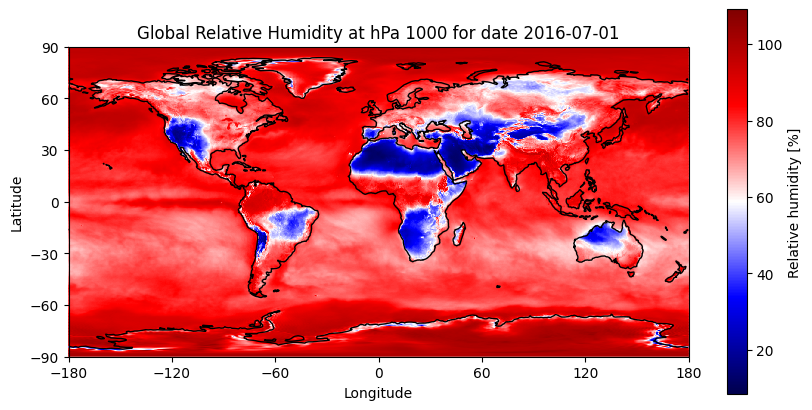

In [9]:
plot_map(xr_press, "r", title="Global Relative Humidity at hPa 1000")

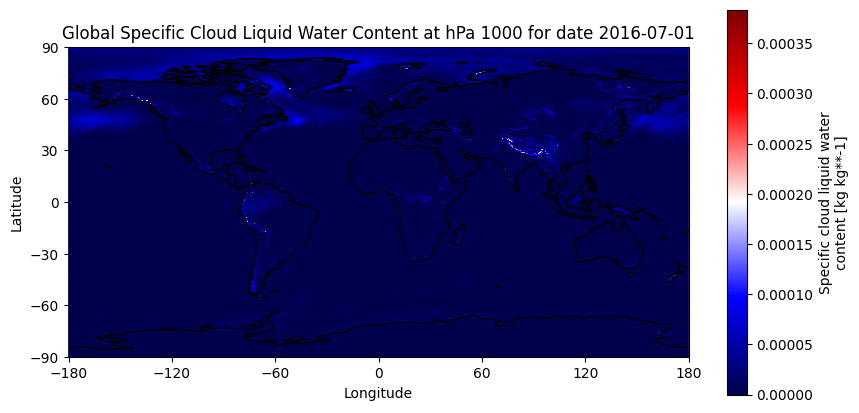

In [10]:
plot_map(xr_press, "clwc", title="Global Specific Cloud Liquid Water Content at hPa 1000")

In [9]:
df_press = xr_press.to_dataframe()

In [10]:
df_press.reset_index(inplace=True)

In [11]:
df_press = df_press.rename(columns={"latitude":"lat", "longitude":"lon", "r": "relative_humidity"})
df_press

,time,pressure_level,lat,lon,number,expver,relative_humidity,clwc
0,2002-01-01,1000.0,90.0,0.00,0,0001,99.476830,9.536743e-07
1,2002-01-01,1000.0,90.0,0.25,0,0001,99.476830,9.536743e-07
2,2002-01-01,1000.0,90.0,0.50,0,0001,99.476830,9.536743e-07
3,2002-01-01,1000.0,90.0,0.75,0,0001,99.476830,9.536743e-07
4,2002-01-01,1000.0,90.0,1.00,0,0001,99.476830,9.536743e-07
...,...,...,...,...,...,...,...,...
282401275,2024-08-01,1000.0,-90.0,358.75,0,0005,104.000885,0.000000e+00
282401276,2024-08-01,1000.0,-90.0,359.00,0,0005,104.000885,0.000000e+00
282401277,2024-08-01,1000.0,-90.0,359.25,0,0005,104.000885,0.000000e+00
282401278,2024-08-01,1000.0,-90.0,359.50,0,0005,104.000885,0.000000e+00


In [12]:
# save all grids to file
save_all_patches(df_press, patches, "relative_humidity")

> Saving all patches...


  0%|          | 0/162 [00:00<?, ?it/s]/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1024/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1024/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1024/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

Done!


In [13]:
# save all grids to file
save_all_patches(df_press, patches, "clwc")

> Saving all patches...


  0%|          | 0/162 [00:00<?, ?it/s]/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1024/664002593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_rad'] = np.radians(df['lat'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1024/664002593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_weight'] = np.cos(df['lat_rad'])
/var/folders/yy/x3d2mrqx4zdc2sh5v1gfd0b80000gn/T/ipykernel_1024/664002593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

Done!


### Merge All the Three Varibles and Add Exogenous Features

In [14]:
# Define a function to map month to season for exogenous varibles
# def get_season(month):
#     if month in [3.0, 4.0, 5.0]:
#         return 'spring'
#     elif month in [6.0, 7.0, 8.0]:
#         return 'summer'
#     elif month in [9.0, 10.0, 11.0]:
#         return 'Fall'
#     else:  # months 12.0, 1.0, 2.0
#         return 'winter'

def cyclical_encoded(data, cycle_length):

    sin = np.sin(2 * np.pi * data/cycle_length)
    cos = np.cos(2 * np.pi * data/cycle_length)
    result =  pd.DataFrame({
                  f"{data.name}_sin": sin,
                  f"{data.name}_cos": cos
              })

    return result

In [15]:
sla_dir = "/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/raw/sla"
filenames = os.listdir(sla_dir)

#  merge each similar grids of all variables in a single dataframe
for filename in filenames:
    sla_path = os.path.join(sla_dir, filename)
    df_sla = pd.read_csv(sla_path)
    
    # load the same filename for temperature data
    temp_dir = sla_dir.replace("sla", "anom")
    temp_path = os.path.join(temp_dir, filename)
    df_temp = pd.read_csv(temp_path)
    
    # merge the two lwe_thickness and temperature dataframes
    df_merged = pd.merge(df_sla, df_temp, on="time")

    # load the same filename for precipitation data
    precip_dir = sla_dir.replace("sla", "precip")
    precip_path = os.path.join(precip_dir, filename)
    df_precip = pd.read_csv(precip_path)

    # merge precipitation df to the merged the data
    df_merged = pd.merge(df_merged, df_precip, on="time")

    # load the same filename for relative humidity data
    hum_dir = sla_dir.replace("sla", "relative_humidity")
    hum_path = os.path.join(hum_dir, filename)
    df_hum = pd.read_csv(hum_path)
    df_merged = pd.merge(df_merged, df_hum, on="time")

    # load the same filename for clwc data
    clwc_dir = sla_dir.replace("sla", "clwc")
    clwc_path = os.path.join(clwc_dir, filename)
    df_clwc = pd.read_csv(clwc_path)

    # merge clwc df to the merged the data
    df_merged = pd.merge(df_merged, df_clwc, on="time")

    # load the same filename for lwe thickness data
    lwe_thickness_dir = sla_dir.replace("sla", "lwe_thickness")
    lwe_thickness_path = os.path.join(lwe_thickness_dir, filename)
    df_lwe_thickness = pd.read_csv(sla_path)

    # merge lwe thickness df to the merged the data
    df_merged = pd.merge(df_merged, df_lwe_thickness, on="time")

    # load the same filename for eddy kinectic energy data
    eke_dir = sla_dir.replace("sla", "eke")
    eke_path = os.path.join(eke_dir, filename)
    df_eke = pd.read_csv(eke_path)
    
    # merge the two dataframes and add 5 years horizons
    df_merged = pd.merge(df_merged, df_eke, on="time")
    df_merged['time'] = pd.to_datetime(df_merged['time'])
    last_date = df_merged["time"].max()
    new_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=60, freq='MS')
    
    # Create a DataFrame with the new dates
    new_data = pd.DataFrame({"time": new_dates})
    df_merged = pd.concat([df_merged, new_data], ignore_index=True)


    # # add season features
    df_merged['time'] = pd.to_datetime(df_merged['time'])
    #df_merged["season"] = df_merged["time"].dt.month.apply(get_season)

    # add calender features
    df_merged["month"] = df_merged["time"].dt.month
    df_merged["year"] = df_merged["time"].dt.year
    df_merged["quarter"] = df_merged["time"].dt.quarter

    # cyclic calender and seasonal features
    month_cyclic = cyclical_encoded(df_merged["month"], cycle_length=24)
    quarter_cyclic = cyclical_encoded(df_merged["quarter"], cycle_length=4)

    # merge the df to the cyclic the features
    df_exogenous_features = pd.concat([df_merged,month_cyclic, quarter_cyclic], axis=1)
    df_exogenous_features = df_exogenous_features.rename(columns={
        "avg_lwe_thickness":"liquid_water_thickness","avg_anom":"temperature","avg_precip":"precipitation","avg_relative_humidity":"relative_humidity","avg_clwc":"clwc", "sla":"sea_level","eke":"eddy_kinetic_energy"})

    # create directory and filepath
    new_dir = sla_dir.replace("sla", "final_variables")
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)

    filepath = os.path.join(new_dir, filename)

    # save the merged dataframe
    df_exogenous_features.to_csv(filepath, index=False)

In [19]:
# view one csv from the grids
pd.read_csv("/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/raw/all_variables1/-10_10_0_20_4.csv")

,time,liquid_water_thickness,temperature,precipitation,relative_humidity,clwc,season,month,year,quarter,month_sin,month_cos,quarter_sin,quarter_cos
0,2002-04-01,-1.905180,0.622493,5.895700,78.356965,0.000003,spring,4,2002,2,8.660254e-01,5.000000e-01,1.224647e-16,-1.000000e+00
1,2002-05-01,-3.289213,0.825327,4.203326,76.573588,0.000003,spring,5,2002,2,9.659258e-01,2.588190e-01,1.224647e-16,-1.000000e+00
2,2002-06-01,-2.653862,0.593117,3.052680,77.924019,0.000003,summer,6,2002,2,1.000000e+00,6.123234e-17,1.224647e-16,-1.000000e+00
3,2002-07-01,-2.018511,0.672461,3.089706,79.063400,0.000003,summer,7,2002,3,9.659258e-01,-2.588190e-01,-1.000000e+00,-1.836970e-16
4,2002-08-01,-1.383161,0.538538,3.765735,82.146642,0.000003,summer,8,2002,3,8.660254e-01,-5.000000e-01,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2028-08-01,NaN,NaN,NaN,NaN,NaN,summer,8,2028,3,8.660254e-01,-5.000000e-01,-1.000000e+00,-1.836970e-16
317,2028-09-01,NaN,NaN,NaN,NaN,NaN,Fall,9,2028,3,7.071068e-01,-7.071068e-01,-1.000000e+00,-1.836970e-16
318,2028-10-01,NaN,NaN,NaN,NaN,NaN,Fall,10,2028,4,5.000000e-01,-8.660254e-01,-2.449294e-16,1.000000e+00
319,2028-11-01,NaN,NaN,NaN,NaN,NaN,Fall,11,2028,4,2.588190e-01,-9.659258e-01,-2.449294e-16,1.000000e+00


### Land Mask 

In [123]:
land_ds = xr.open_dataset("data/CSR_GRACE_GRACE-FO_RL06_Mascons_v02_LandMask.nc")
land_ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    LO_val   (lat, lon) float32 ...
Attributes: (12/14)
    Conventions:     CF-1.5
    data_reference:  Save, H., S. Bettadpur, B. D. Tapley (2016), High resolu...
    data_author:     Himanshu Save (save@csr.utexas.edu)
    url:             https://doi.org/10.15781/cgq9-nh24
    doi:             10.15781/cgq9-nh24
    summary:         CSR RL06 Mascon V02 Land Mask
    ...              ...
    variable:        Land=1 and Ocean=0
    Longitudes:       LON1_NLONS_DLON=0.125. 1440 0.25
    Latitudes:        LAT1_NLATS_DLAT=-89.875 720 0.25
    label:           Land_Mask_RL06M
    Mask:            Global
    DATE_CREATED:    Fri Jul 12 10:41:31 CDT 2019

In [129]:
land_ds.attrs

{'Conventions': 'CF-1.5',
 'data_reference': 'Save, H., S. Bettadpur, B. D. Tapley (2016), High resolution CSR GRACE RL05 mascons, J. Geophys. Res. Solid Earth',
 'data_author': 'Himanshu Save (save@csr.utexas.edu)',
 'url': 'https://doi.org/10.15781/cgq9-nh24',
 'doi': '10.15781/cgq9-nh24',
 'summary': 'CSR RL06 Mascon V02 Land Mask',
 'filename': 'netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_v02_LandMask.nc',
 'institution': 'The University of Texas - Center for Space Research (CSR)',
 'variable': 'Land=1 and Ocean=0',
 'Longitudes': ' LON1_NLONS_DLON=0.125. 1440 0.25',
 'Latitudes': ' LAT1_NLATS_DLAT=-89.875 720 0.25',
 'label': 'Land_Mask_RL06M',
 'Mask': 'Global',
 'DATE_CREATED': 'Fri Jul 12 10:41:31 CDT 2019'}

In [113]:
land_ds.LO_val

<xarray.DataArray 'LO_val' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    units:       
    long_name:   Land_Mask
    short_name:  LandMask

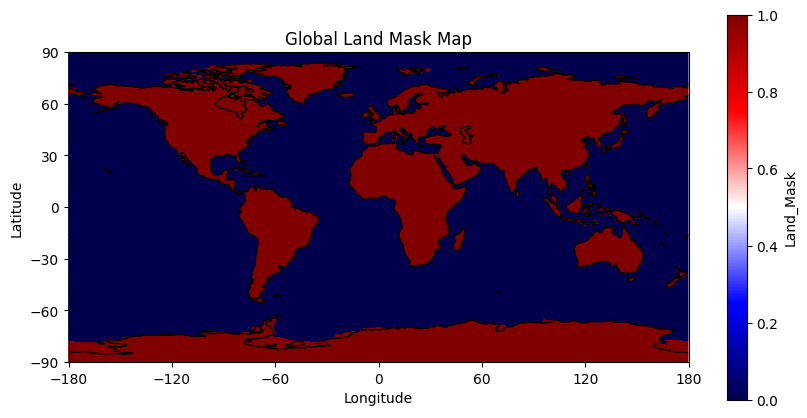

In [125]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
land_ds.LO_val.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="seismic")
ax.coastlines()
plt.title(f'Global Land Mask Map')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

## Reference
- Huang, B., C. Liu, V. Banzon, E. Freeman, G. Graham, B. Hankins, T. Smith, and H.-M. Zhang, 2021: Improvements of the Daily Optimum Interpolation Sea Surface Temperature (DOISST) Version 2.1, Journal of Climate, 34, 2923-2939. doi: 10.1175/JCLI-D-20-0166.1

- Adler, Robert; Wang, Jian-Jian; Sapiano, Matthew; Huffman, George; Chiu, Long; Xie, Ping Ping; Ferraro, Ralph; Schneider, Udo; Becker, Andreas; Bolvin, David; Nelkin, Eric; Gu, Guojun; and NOAA CDR Program (2016). Global Precipitation Climatology Project (GPCP) Climate Data Record (CDR), Version 2.3 (Monthly). National Centers for Environmental Information. doi:10.7289/V56971M6

- H., S. Bettadpur, and B.D. Tapley (2016), High resolution CSR GRACE RL05 mascons, J. Geophys. Res. Solid Earth, 121, doi:10.1002/2016JB013007.

- Himanshu, 2020, "CSR GRACE and GRACE-FO RL06 Mascon Solutions v02", [doi: 10.15781/cgq9-nh24](https://doi.org/10.15781/cgq9-nh24).